# coadded spectra in 1 obsid

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 3207
download_chandra_obsid 3207 evt1,pbk,bias,asol,bpix,flt,fov,msk,mtl,dtf,stat
chandra_repro 3207 out=`pwd` clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      216 Mb  ####################            4 s  49209.6 kb/s
  asol     fits       26 Mb  ####################          < 1 s  44451.1 kb/s
  mtl      fits        5 Mb  ####################          < 1 s  37559.2 kb/s
  stat     fits        4 Mb  ####################          < 1 s  50470.6 kb/s
  bias     fits      497 Kb  ####################          < 1 s  22133.8 kb/s
  bias     fits      434 Kb  ####################          < 1 s  18066.4 kb/s
  bias     fits      431 Kb  ####################          < 1 s  20918.0 kb/s
  bias     fits      430 Kb  ####################          < 1 s  25266.4 kb/s
  bias     fits      428 Kb  ####################          < 1 s  14757.2 kb/s
  bpix     fits       79 Kb  ####################          < 1 s  5995.3 kb/s
  fov      fits        8 Kb  ####################     

In [3]:
dmcopy "acisf03207_repro_evt2.fits[ccd_id=7]" c7.evt clob+
fluximage c7.evt ./ bin=1 clob+ psfecf=0.393

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf03207_000N001_asol1.fits found.
Bad-pixel file acisf03207_repro_bpix1.fits found.
Mask file acisf03207_000N004_msk1.fits found.

The output images will have 1312 by 1312 pixels, pixel size of 0.492 arcsec,
    and cover x=3375.5:4687.5:1,y=3155.5:4467.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histogram for obsid 3207
Creating instrument map for obsid 3207
Creating exposure map for obsid 3207
Thresholding data for obsid 3207
Exposure-correcting image for obsid 3207
Creating PSF map for obsid 3207

The following files were created:

 The clipped counts image is:
     ./broad_thresh.img

 The clipped exposure map is:
     ./broad_thresh.expmap

 The PSF map is:
     ./broad_thresh.psfmap

 The exposure-corrected image is:
     ./broad_flux.img



In [4]:
#mkpsfmap broad_thresh.img broad_thresh.psfmap 1.49 ecf=0.393 clob+


In [5]:
punlearn wavdetect
pset wavdetect infile=broad_thresh.img
pset wavdetect outfile=wav.fits
pset wavdetect scellfile=wav.scell
pset wavdetect imagefile=wav.img
pset wavdetect defnbkgfile=wav.nbkg
pset wavdetect scales="2 4 8 16 32 64"
pset wavdetect psffile=broad_thresh.psfmap
pset wavdetect expfile=broad_thresh.expmap
pset wavdetect regfile=wav.reg
wavdetect mode=h clobber=yes

In [6]:
dmlist wav.fits counts

44      


In [7]:
dmlist "wav.fits[exclude pos=circle(4070,3945,20)]" counts

40      


In [8]:
dmcopy "wav.fits[exclude pos=circle(4070,3945,20)]" no-clus.fits clob+
dmstat "no-clus.fits[cols net_counts]"

NET_COUNTS[count]
    min:	5.5485892296 	      @:	39 
    max:	497.16720581 	      @:	27 
   mean:	58.735442305 
  sigma:	86.024893622 
    sum:	2349.4176922 
   good:	40 
   null:	0 



In [9]:
dmlist "no-clus.fits[net_counts=100:]" counts

8       


In [10]:
dmcopy "no-clus.fits[net_counts=100:]" src.fits clob+

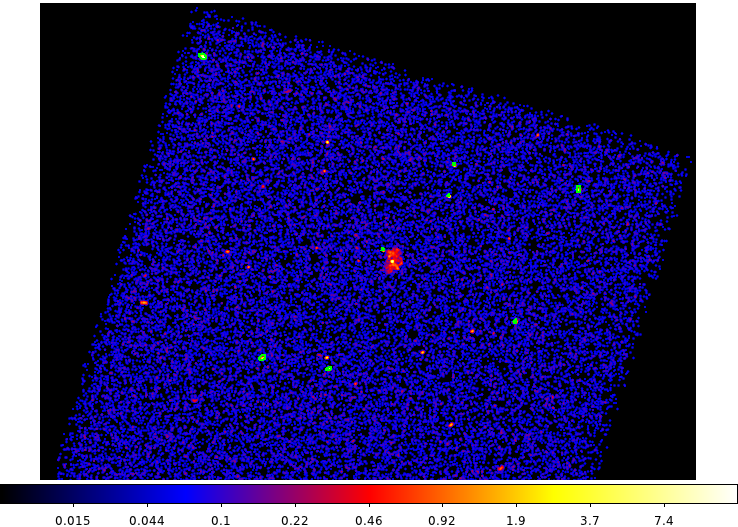

In [11]:
ds9 -region width 2 broad_thresh.img -smooth -scale log -cmap b \
     -zoom 0.5 -pan to 4020 3990 physical -region src.fits \
     -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

In [12]:
dmmakereg region="region(src.fits)" out=src.reg kernel=ascii clob+
cat src.reg

# Region file format: DS9 version 4.1
global color=blue dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
physical
Ellipse(3939.65,3732.18,5.30179,3.19864,15.4853) #  
Ellipse(3806.98,3754.33,7.08125,4.18562,26.0989) #  
Ellipse(4312.56,3827.05,3.9379,2.64072,50.7592) #  
Ellipse(4048.22,3970.57,2.44139,1.96386,20.4309) #  
Ellipse(4179.67,4078.33,2.33642,2.05695,9.03762) #  
Ellipse(4439.89,4091.26,6.46662,3.97055,92.5572) #  
Ellipse(4190.34,4140.68,2.40601,2.13286,46.3592) #  
Ellipse(3687.97,4356.76,7.13883,4.4737,149.623) #  


In [13]:
grep Ellipse src.reg | \
  awk '{print "acisf03207_repro_evt2.fits[sky="$1"]"}' > multi.lis

#sed  \
#  -e "s:^physical;:acisf03207_repro_evt2.fits[sky=:" \
#  -e "s/Ellipse/ellipse/" \
#  -e "s/ #/]/" > multi.lis

cat multi.lis

acisf03207_repro_evt2.fits[sky=Ellipse(3939.65,3732.18,5.30179,3.19864,15.4853)]
acisf03207_repro_evt2.fits[sky=Ellipse(3806.98,3754.33,7.08125,4.18562,26.0989)]
acisf03207_repro_evt2.fits[sky=Ellipse(4312.56,3827.05,3.9379,2.64072,50.7592)]
acisf03207_repro_evt2.fits[sky=Ellipse(4048.22,3970.57,2.44139,1.96386,20.4309)]
acisf03207_repro_evt2.fits[sky=Ellipse(4179.67,4078.33,2.33642,2.05695,9.03762)]
acisf03207_repro_evt2.fits[sky=Ellipse(4439.89,4091.26,6.46662,3.97055,92.5572)]
acisf03207_repro_evt2.fits[sky=Ellipse(4190.34,4140.68,2.40601,2.13286,46.3592)]
acisf03207_repro_evt2.fits[sky=Ellipse(3687.97,4356.76,7.13883,4.4737,149.623)]


## One spectra for each source

In [14]:
punlearn specextract
pset specextract infile=@multi.lis
pset specextract outroot=3c294
pset specextract weight=no
pset specextract correctpsf=yes
pset specextract combine=no
specextract mode=h clob+


Running specextract
Version: 11 May 2018

Using event file acisf03207_repro_evt2.fits[sky=Ellipse(3939.65,3732.18,5.30179,3.19864,15.4853)]

Aspect solution file pcadf131209709N003_asol1.fits found.

Bad-pixel file acisf03207_repro_bpix1.fits found.

Mask file acisf03207_000N003_msk1.fits found.

Using event file acisf03207_repro_evt2.fits[sky=Ellipse(3806.98,3754.33,7.08125,4.18562,26.0989)]

Aspect solution file pcadf131209709N003_asol1.fits found.

Bad-pixel file acisf03207_repro_bpix1.fits found.

Mask file acisf03207_000N003_msk1.fits found.

Using event file acisf03207_repro_evt2.fits[sky=Ellipse(4312.56,3827.05,3.9379,2.64072,50.7592)]

Aspect solution file pcadf131209709N003_asol1.fits found.

Bad-pixel file acisf03207_repro_bpix1.fits found.

Mask file acisf03207_000N003_msk1.fits found.

Using event file acisf03207_repro_evt2.fits[sky=Ellipse(4048.22,3970.57,2.44139,1.96386,20.4309)]

Aspect solution file pcadf131209709N003_asol1.fits found.

Bad-pixel file acisf03207_repro_b

In [15]:
/bin/ls 3c294_src*.pi | grep -v _grp > src.lis
cat src.lis

3c294_src1.pi
3c294_src2.pi
3c294_src3.pi
3c294_src4.pi
3c294_src5.pi
3c294_src6.pi
3c294_src7.pi
3c294_src8.pi


In [16]:
pset combine_spectra src_spectra=@src.lis
pset combine_spectra out=3c294_combined
pset combine_spectra method=avg

combine_spectra mode=h clob+

Prepared to combine 8 spectra

source PHA: 3c294_src1.pi
       ARF: 3c294_src1.corr.arf
       RMF: 3c294_src1.rmf
source PHA: 3c294_src2.pi
       ARF: 3c294_src2.corr.arf
       RMF: 3c294_src2.rmf
source PHA: 3c294_src3.pi
       ARF: 3c294_src3.corr.arf
       RMF: 3c294_src3.rmf
source PHA: 3c294_src4.pi
       ARF: 3c294_src4.corr.arf
       RMF: 3c294_src4.rmf
source PHA: 3c294_src5.pi
       ARF: 3c294_src5.corr.arf
       RMF: 3c294_src5.rmf
source PHA: 3c294_src6.pi
       ARF: 3c294_src6.corr.arf
       RMF: 3c294_src6.rmf
source PHA: 3c294_src7.pi
       ARF: 3c294_src7.corr.arf
       RMF: 3c294_src7.rmf
source PHA: 3c294_src8.pi
       ARF: 3c294_src8.corr.arf
       RMF: 3c294_src8.rmf

The following files were created:
  3c294_combined_src.pi
  3c294_combined_src.arf
  3c294_combined_src.rmf


## Weighted sum

In [17]:
punlearn specextract
pset specextract infile="acisf03207_repro_evt2.fits[sky=region(src.fits)]"
pset specextract outroot=combined
specextract mode=h clob+

Running specextract
Version: 11 May 2018

Using event file acisf03207_repro_evt2.fits[sky=region(src.fits)]

Aspect solution file pcadf131209709N003_asol1.fits found.

Bad-pixel file acisf03207_repro_bpix1.fits found.

Mask file acisf03207_000N003_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Creating src RMF 

Using mkacisrmf...

Grouping src spectrum 

Updating header of combined.pi with RESPFILE and ANCRFILE keywords.

Updating header of combined_grp.pi with RESPFILE and ANCRFILE keywords.



In [18]:
/bin/ls combined*

combined.arf  combined.pi  combined.rmf  combined_grp.pi


## Fitting

read ARF file 3c294_combined_src.arf
read RMF file 3c294_combined_src.rmf
read ARF file combined.arf
read RMF file combined.rmf


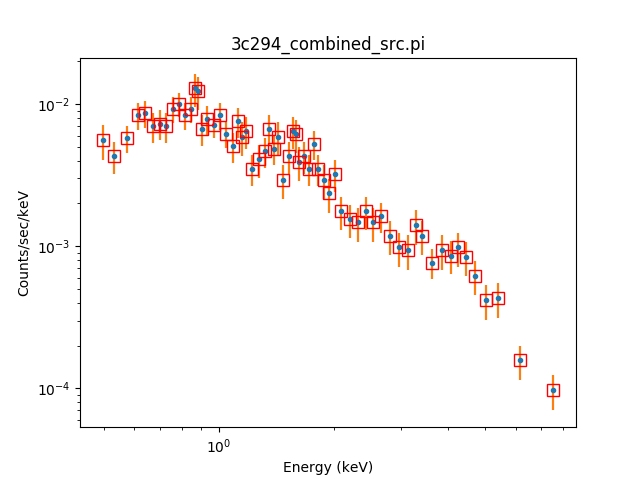

In [21]:
cat << EOM > s1.py
from sherpa.astro.ui import *
import matplotlib.pylab as plt

load_pha("3c294_combined_src.pi")
load_pha(2, "combined.pi")
notice(0.5, 7)
group_counts(1, 20)
group_counts(2, 20)
plot_data(1)

###set_curve(["*.color", "red", "symbol.size", 5])
plot_data(2, overplot=True)

last_curve = plt.gca().lines[-1]
last_curve.set_mfc("none")
last_curve.set_markersize(8)
last_curve.set_mec("red")
last_curve.set_marker("s")

plt.xscale("log")
plt.yscale("log")
plt.savefig("sherpa_01.png")
EOM

python s1.py
display < sherpa_01.png

# Cleanup


In [ ]:
/bin/rm -rf 3207
/bin/rm -f acisf* pcadf* 